In [1]:
# 21CSB0B36 CHECKERS GAME 10X10
# for mathematical operations
import numpy as np
import time
import random
from tqdm import tqdm
# for the GUI
import pygame
# for the plot of error
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.5.1 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# 21CSB0B36 CHECKERS GAME 10X10
class Board:
    def __init__(self):
        # Initialize the board
        self.board = np.zeros((10, 10), dtype=int)
        player1_positions = [ (6, 0), (6, 2), (6, 4), (6, 6),(6,8), (7, 1), (7, 3),
                             (7, 5), (7, 7),(7,9), (8, 0), (8, 2), (8, 4), (8, 6),
                             (8,8),(9, 1), (9, 3), (9, 5), (9, 7),(9,9)]
        player2_positions = [(0, 0), (0, 2), (0, 4), (0, 6),(0,8), (1, 1), 
                             (1, 3), (1, 5), (1, 7), (1,9),(2, 0), (2, 2), 
                             (2,4), (2, 6),(2,8), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9)]
        for pos in player1_positions:
            self.board[pos] = 1
        for pos in player2_positions:
            self.board[pos] = 2
            
    def print_board(self):
        # ANSI color codes for coloured printing
        RED = '\033[91m'
        BLUE = '\033[94m'
        RESET = '\033[0m'
        for row in self.board:
            for item in row:
                if item == 1 :
                    print(RED + str(item) + RESET, end='  ')
                elif item == 2:
                    print(BLUE + str(item) + RESET, end='  ')
                elif item == 11:
                    print(RED + str(item) + RESET, end=' ')
                elif item == 22:
                    print(BLUE + str(item) + RESET, end=' ')
                else:
                    print(item, end='  ')
            print()  


    def board_stats(self):
        # Returns the number of pieces for each player and the number of pieces that can jump for each player
        # [player, player 1 pieces, player 2 pieces, player 1 pieces that can jump, player 2 pieces that can jump, player 1 kings, player 2 kings]
        stats = [1, np.sum(self.board == 1 )+np.sum(self.board == 11), np.sum(self.board == 2 )+np.sum(self.board == 22), 0, 0, 0, 0]

        for i in range(10):
            for j in range(10):
                # how many player 2 is player 1 threathening
                if self.board[i, j] == 1:
                    if i - 1 >= 0 and j - 1 >= 0:
                        if (self.board[i - 1, j - 1] == 2 or self.board[i - 1, j - 1] == 22) and i - 2 >= 0 and j - 2 >= 0 and self.board[i - 2, j - 2] == 0:
                            stats[3] += 1
                    if i - 1 >= 0 and j + 1 <= 9:
                        if (self.board[i - 1, j + 1] == 2 or self.board[i - 1, j + 1] == 22) and i - 2 >= 0 and j + 2 <= 9 and self.board[i - 2, j + 2] == 0:
                            stats[3] += 1
                # how many player 1 is player 2 threathening
                elif self.board[i, j] == 2:
                    if i + 1 <= 9 and j - 1 >= 0:
                        if (self.board[i + 1, j - 1] == 1 or self.board[i + 1, j - 1] == 11) and i + 2 <= 9 and j - 2 >= 0 and self.board[i + 2, j - 2] == 0:
                            stats[4] += 1
                    if i + 1 <= 9 and j + 1 <= 9:
                        if (self.board[i + 1, j + 1] == 1 or self.board[i + 1, j + 1] == 11) and i + 2 <= 9 and j + 2 <= 9 and self.board[i + 2, j + 2] == 0:
                            stats[4] += 1
                # player 1 king
                elif self.board[i,j]==11:
                    stats[5]+=1
                    # top left
                    if i - 1 >= 0 and j - 1 >= 0:
                        if (self.board[i - 1, j - 1] == 2 or self.board[i - 1, j - 1] == 22) and i - 2 >= 0 and j - 2 >= 0 and self.board[i - 2, j - 2] == 0:
                            stats[3] += 1
                    # top right
                    if i - 1 >= 0 and j + 1 <= 9:
                        if (self.board[i - 1, j + 1] == 2 or self.board[i - 1, j + 1] == 22) and i - 2 >= 0 and j + 2 <= 9 and self.board[i - 2, j + 2] == 0:
                            stats[3] += 1
                    # bottom left
                    if i + 1 <= 9 and j - 1 >= 0:
                        if (self.board[i + 1, j - 1] == 2 or self.board[i + 1, j - 1] == 22) and i + 2 <= 9 and j - 2 >= 0 and self.board[i + 2, j - 2] == 0:
                            stats[3] += 1
                    # bottom right
                    if i + 1 <= 9 and j + 1 <= 9:
                        if (self.board[i + 1, j + 1] == 2 or self.board[i + 1, j + 1] == 22) and i + 2 <= 9 and j + 2 <= 9 and self.board[i + 2, j + 2] == 0:
                            stats[3] += 1
                # player 2 king
                elif self.board[i,j]==22:
                    stats[6]+=1
                    # bottom left
                    if i + 1 <= 9 and j - 1 >= 0:
                        if (self.board[i + 1, j - 1] == 1 or self.board[i + 1, j - 1] == 11) and i + 2 <= 9 and j - 2 >= 0 and self.board[i + 2, j - 2] == 0:
                            stats[4] += 1
                    # bottom right
                    if i + 1 <= 9 and j + 1 <= 9:
                        if (self.board[i + 1, j + 1] == 1 or self.board[i + 1, j + 1] == 11) and i + 2 <= 9 and j + 2 <= 9 and self.board[i + 2, j + 2] == 0:
                            stats[4] += 1
                    # top left
                    if i - 1 >= 0 and j - 1 >= 0:
                        if (self.board[i - 1, j - 1] == 1 or self.board[i - 1, j - 1] == 11) and i - 2 >= 0 and j - 2 >= 0 and self.board[i - 2, j - 2] == 0:
                            stats[4] += 1
                    # top right
                    if i - 1 >= 0 and j + 1 <= 9:
                        if (self.board[i - 1, j + 1] == 1 or self.board[i - 1, j + 1] == 11) and i - 2 >= 0 and j + 2 <= 9 and self.board[i - 2, j + 2] == 0:
                            stats[4] += 1
        return stats

    def get_moves(self, player):
        # Get all possible moves for a player
        normal_moves = []
        kill_moves = []
        for i in range(10):
            for j in range(10):
                if self.board[i, j] == player or self.board[i, j] == player * 11:
                    if player == 1:
                        if self.board[i,j]==1:
                            if i - 1 >= 0 and j - 1 >= 0:
                                if (self.board[i - 1, j - 1] == 2 or self.board[i - 1, j - 1] == 22) and i - 2 >= 0 and j - 2 >= 0 and self.board[i - 2, j - 2] == 0:
                                    kill_moves.append([i, j, i - 1, j - 1])
                                if self.board[i - 1, j - 1] == 0:
                                    normal_moves.append([i, j, i - 1, j - 1])
                            if i - 1 >= 0 and j + 1 <= 9:
                                if (self.board[i - 1, j + 1] == 2 or self.board[i - 1, j + 1] == 22 ) and i - 2 >= 0 and j + 2 <= 9 and self.board[i - 2, j + 2] == 0:
                                    kill_moves.append([i, j, i - 1, j + 1])
                                if self.board[i - 1, j + 1] == 0:
                                    normal_moves.append([i, j, i - 1, j + 1])
                        elif self.board[i,j]==11:
                            # top left
                            if i - 1 >= 0 and j - 1 >= 0:
                                if (self.board[i - 1, j - 1] == 2 or self.board[i - 1, j - 1] == 22) and i - 2 >= 0 and j - 2 >= 0 and self.board[i - 2, j - 2] == 0:
                                    kill_moves.append([i, j, i - 1, j - 1])
                                if self.board[i - 1, j - 1] == 0:
                                    normal_moves.append([i, j, i - 1, j - 1])
                            # top right
                            if i - 1 >= 0 and j + 1 <= 9:
                                if (self.board[i - 1, j + 1] == 2 or self.board[i - 1, j + 1] == 22) and i - 2 >= 0 and j + 2 <= 9 and self.board[i - 2, j + 2] == 0:
                                    kill_moves.append([i, j, i - 1, j + 1])
                                if self.board[i - 1, j + 1] == 0:
                                    normal_moves.append([i, j, i - 1, j + 1])
                            # bottom left
                            if i + 1 <= 9 and j - 1 >= 0:
                                if (self.board[i + 1, j - 1] == 2 or self.board[i + 1, j - 1] == 22) and i + 2 <= 9 and j - 2 >= 0 and self.board[i + 2, j - 2] == 0:
                                    kill_moves.append([i, j, i + 1, j - 1])
                                if self.board[i + 1, j - 1] == 0:
                                    normal_moves.append([i, j, i + 1, j - 1])
                            # bottom right
                            if i + 1 <= 9 and j + 1 <= 9:
                                if (self.board[i + 1, j + 1] == 2 or self.board[i + 1, j + 1] == 22) and i + 2 <= 9 and j + 2 <= 9 and self.board[i + 2, j + 2] == 0:
                                    kill_moves.append([i, j, i + 1, j + 1])
                                if self.board[i + 1, j + 1] == 0:
                                    normal_moves.append([i, j, i + 1, j + 1])
                    else:
                        if self.board[i,j]==2:
                            if i + 1 <= 9 and j - 1 >= 0:
                                if (self.board[i + 1, j - 1] == 1 or self.board[i + 1, j - 1] == 11) and i + 2 <= 9 and j - 2 >= 0 and self.board[i + 2, j - 2] == 0:
                                    kill_moves.append([i, j, i + 1, j - 1])
                                if self.board[i + 1, j - 1] == 0:
                                    normal_moves.append([i, j, i + 1, j - 1])
                            if i + 1 <= 9 and j + 1 <= 9:
                                if (self.board[i + 1, j + 1] == 1 or self.board[i + 1, j + 1] == 11) and i + 2 <= 9 and j + 2 <= 9 and self.board[i + 2, j + 2] == 0:
                                    kill_moves.append([i, j, i + 1, j + 1])
                                if self.board[i + 1, j + 1] == 0:
                                    normal_moves.append([i, j, i + 1, j + 1])
                        elif self.board[i,j]==22:
                            # bottom left
                            if i + 1 <= 9 and j - 1 >= 0:
                                if (self.board[i + 1, j - 1] == 1 or self.board[i + 1, j - 1] == 11) and i + 2 <= 9 and j - 2 >= 0 and self.board[i + 2, j - 2] == 0:
                                    kill_moves.append([i, j, i + 1, j - 1])
                                if self.board[i + 1, j - 1] == 0:
                                    normal_moves.append([i, j, i + 1, j - 1])
                            # bottom right
                            if i + 1 <= 9 and j + 1 <= 9:
                                if (self.board[i + 1, j + 1] == 1 or self.board[i + 1, j + 1] == 11) and i + 2 <= 9 and j + 2 <= 9 and self.board[i + 2, j + 2] == 0:
                                    kill_moves.append([i, j, i + 1, j + 1])
                                if self.board[i + 1, j + 1] == 0:
                                    normal_moves.append([i, j, i + 1, j + 1])
                            # top left
                            if i - 1 >= 0 and j - 1 >= 0:
                                if (self.board[i - 1, j - 1] == 1 or self.board[i - 1, j - 1] == 11) and i - 2 >= 0 and j - 2 >= 0 and self.board[i - 2, j - 2] == 0:
                                    kill_moves.append([i, j, i - 1, j - 1])
                                if self.board[i - 1, j - 1] == 0:
                                    normal_moves.append([i, j, i - 1, j - 1])
                            # top right
                            if i - 1 >= 0 and j + 1 <= 9:
                                if (self.board[i - 1, j + 1] == 1 or self.board[i - 1, j + 1] == 11) and i - 2 >= 0 and j + 2 <= 9 and self.board[i - 2, j + 2] == 0:
                                    kill_moves.append([i, j, i - 1, j + 1])
                                if self.board[i - 1, j + 1] == 0:
                                    normal_moves.append([i, j, i - 1, j + 1])
        if len(kill_moves)>0:
            return kill_moves
        else:
            return normal_moves

    #this function get's moves for human player for a specific checker
    def get_available_moves(self, player, row, col):
        # Get all possible moves for a player's piece at a specific position
        normal_moves = []
        kill_moves = []
        
        if player == 1 :  # Player 1's piece or king
            if self.board[row][col] in [1, 11]:
                # Check for moves to the top-left and top-right diagonals
                if row - 1 >= 0:
                    if col - 1 >= 0 and self.board[row - 1][col - 1] == 0:
                        normal_moves.append((row - 1, col - 1))
                    elif col - 2 >= 0 and (self.board[row - 1][col - 1] == 2 or self.board[row - 1][col - 1] == 22)  and self.board[row - 2][col - 2] == 0:
                        kill_moves.append((row - 2, col - 2))
                if row - 1 >= 0:
                    if col + 1 < 10 and self.board[row - 1][col + 1] == 0:
                        normal_moves.append((row - 1, col + 1))
                    elif col + 2 < 10 and (self.board[row - 1][col + 1] == 2 or self.board[row - 1][col + 1] == 22) and self.board[row - 2][col + 2] == 0:
                        kill_moves.append((row - 2, col + 2))
                # Check for moves to the bottom-left and bottom-right diagonals for kings
                if self.board[row][col] == 11:
                    print("here")
                    if row + 1 < 10:
                        if col - 1 >= 0 and self.board[row + 1][col - 1] == 0:
                            normal_moves.append((row + 1, col - 1))
                        elif col - 2 >= 0 and (self.board[row + 1][col - 1] == 2 or self.board[row + 1][col - 1] == 22) and self.board[row + 2][col - 2] == 0:
                            kill_moves.append((row + 2, col - 2))
                    if row + 1 < 10:
                        if col + 1 < 10 and self.board[row + 1][col + 1] == 0:
                            normal_moves.append((row + 1, col + 1))
                        elif col + 2 < 10 and (self.board[row + 1][col + 1] == 2 or self.board[row + 1][col + 1] == 22) and self.board[row + 2][col + 2] == 0:
                            kill_moves.append((row + 2, col + 2))
        if kill_moves:
            return kill_moves
        else:
            return normal_moves

    def check(self,player):
        # to search for any kings
        for i in range(10):
            for j in range(10):
                if self.board[i,j]==player:
                    if player==1:
                        if i==0:
                            self.board[i,j]=11
                    else:
                        if i==9:
                            self.board[i,j]=22
                        

In [3]:
# 21CSB0B36 CHECKERS GAME 10X10
board = Board()
board.print_board()

2  0  2  0  2  0  2  0  2  0  
0  2  0  2  0  2  0  2  0  2  
2  0  2  0  2  0  2  0  2  0  
0  2  0  2  0  2  0  2  0  2  
0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  
1  0  1  0  1  0  1  0  1  0  
0  1  0  1  0  1  0  1  0  1  
1  0  1  0  1  0  1  0  1  0  
0  1  0  1  0  1  0  1  0  1  


In [4]:
# 21CSB0B36 CHECKERS GAME 10X10

board = Board()
board.print_board()

# Initialize weights
error = []
weights = [-0.5, 1, -1, 1, -1, 1, -1]
learning_rate = 0.1
one_wins = 0
two_wins = 0
# Play 100 games
for i in tqdm(range(100)):
    MSE = 0
    # Initialize the board
    board = Board()

    while True:
        # Get moves for player 1----------------------------------------------------------------------------
        moves = board.get_moves(1)
        if len(moves) == 0:
            error.append(MSE)
            two_wins += 1
            # print("Player 2 wins")
            break
        # get stats--------------------------------------------------------------------------------------------
        stats = board.board_stats()
        best_move = []
        best_value = -100000000
        # below value is V(cap) of x
        curr_value = weights[0] + weights[1] * stats[1] + weights[2] * stats[2] + weights[3] * stats[3] + weights[4] * stats[4] + weights[5] * stats[5] + weights[6] * stats[6]
        # ---------------------------------------
        # this for loop checks all possible moves and updates based on the best move
        for move in moves:
            new_board = Board()
            new_board.board = np.copy(board.board)
            if new_board.board[move[2],move[3]]==2 or new_board.board[move[2],move[3]]==22:
                new_board.board[move[2]+(move[2]-move[0]),move[3]+(move[3]-move[1])]=board.board[move[0],move[1]]
                new_board.board[move[2],move[3]]=0
            else:
                new_board.board[move[2], move[3]] = board.board[move[0], move[1]]

            new_board.board[move[0], move[1]] = 0
            new_stats = new_board.board_stats()
            value = weights[0] + weights[1] * new_stats[1] + weights[2] * new_stats[2] + weights[3] * new_stats[3] + weights[4] * new_stats[4] + weights[5] * new_stats[5] + weights[6] * new_stats[6]

            if value > best_value:
                best_value = value
                best_move = move
        # -----------------------------------------
        # finalize the best_move in the board
        if board.board[best_move[2],best_move[3]]==2 or board.board[best_move[2],best_move[3]]==22:
                board.board[best_move[2]+(best_move[2]-best_move[0]),best_move[3]+(best_move[3]-best_move[1])]=board.board[best_move[0],best_move[1]]
                board.board[best_move[2],best_move[3]]=0
        else:
            board.board[best_move[2], best_move[3]] = board.board[best_move[0], best_move[1]]

        board.board[best_move[0], best_move[1]] = 0

        for j in range(7):
            weights[j] += learning_rate * stats[j] * (best_value - curr_value)
        MSE+= (best_value - curr_value)**2
        # check for any kings
        board.check(1)
        # time for player 2-------------------------------------------------------------------------------
        moves = board.get_moves(2)
        if len(moves) == 0:
            error.append(MSE)
            one_wins += 1
            # print("Player 1 wins")
            break

        stats = board.board_stats()
        best_move = []
        best_value = 100000000
        curr_value = weights[0] + weights[1] * stats[1] + weights[2] * stats[2] + weights[3] * stats[3] + weights[4] * stats[4] + weights[5] * stats[5] + weights[6] * stats[6]

        if random.random() < 0.5:  # Adjust the threshold as needed
        # if True:
        # Enter the loop to evaluate moves
            for move in moves:
                new_board = Board()
                new_board.board = np.copy(board.board)
                # based on jump we decide the move
                if new_board.board[move[2],move[3]]==1 or new_board.board[move[2],move[3]]==11:
                    new_board.board[move[2]+(move[2]-move[0]),move[3]+(move[3]-move[1])]=board.board[move[0],move[1]]
                    new_board.board[move[2],move[3]]=0
                else:
                    new_board.board[move[2], move[3]] = board.board[move[0], move[1]]
                new_board.board[move[0], move[1]] = 0
                
                new_stats = new_board.board_stats()
                value = weights[0] + weights[1] * new_stats[1] + weights[2] * new_stats[2] + weights[3] * new_stats[3] + weights[4] * new_stats[4] + weights[5] * new_stats[5] + weights[6] * new_stats[6]

                if value < best_value:
                    best_value = value
                    best_move = move
        else:
            # Choose a random move from the list of moves
            best_move = random.choice(moves)
            new_board = Board()
            new_board.board = np.copy(board.board)
            if new_board.board[best_move[2],best_move[3]]==1 or new_board.board[best_move[2],best_move[3]]==11:
                    new_board.board[best_move[2]+(best_move[2]-best_move[0]),best_move[3]+(best_move[3]-best_move[1])]=board.board[best_move[0],best_move[1]]
                    new_board.board[best_move[2],best_move[3]]=0
            else:
                new_board.board[best_move[2], best_move[3]] = board.board[best_move[0], best_move[1]]

            new_board.board[best_move[0], best_move[1]] = 0
            
            new_stats = new_board.board_stats()
            best_value = weights[0] + weights[1] * new_stats[1] + weights[2] * new_stats[2] + weights[3] * new_stats[3] + weights[4] * new_stats[4] + weights[5] * new_stats[5] + weights[6] * new_stats[6]
        
        if board.board[best_move[2],best_move[3]]==1 or board.board[best_move[2],best_move[3]]==11:
                board.board[best_move[2]+(best_move[2]-best_move[0]),best_move[3]+(best_move[3]-best_move[1])]=board.board[best_move[0],best_move[1]]
                board.board[best_move[2],best_move[3]]=0
        else:
            board.board[best_move[2], best_move[3]] = board.board[best_move[0], best_move[1]]

        board.board[best_move[0], best_move[1]] = 0
        for j in range(7):
            weights[j] += learning_rate * stats[j] * (best_value - curr_value)
        board.check(2)
print("Player 1 wins : ", one_wins)
print("Player 2 wins : ", two_wins)

print(weights)



    
         


2  0  2  0  2  0  2  0  2  0  
0  2  0  2  0  2  0  2  0  2  
2  0  2  0  2  0  2  0  2  0  
0  2  0  2  0  2  0  2  0  2  
0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  
1  0  1  0  1  0  1  0  1  0  
0  1  0  1  0  1  0  1  0  1  
1  0  1  0  1  0  1  0  1  0  
0  1  0  1  0  1  0  1  0  1  


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [03:14<00:00,  1.94s/it]

Player 1 wins :  62
Player 2 wins :  38
[0.10340471853522486, 0.050142400249883305, 0.004731946464584074, 0.008799558965420656, -0.0016315811196406828, 0.04352590370467428, -0.05597847216896703]


[215.947124344555, 9.372371520541332, 40.52026037099582, 20.608318284360877, 3.0244156366776878, 36.778622727682155, 19.753161476690767, 0.18513074654820075, 0.9618321294242906, 3.3545876894205815, 3.0586201414696266, 1.8005136414990377, 10.939466558199463, 0.49792792737171865, 0.5956297255939152, 0.005440462259474175, 0.003539924865980956, 0.0005194374843725272, 1.788961910073717, 46.147756980433904, 17.42929673190485, 1.4080330634180427, 0.3585936724105069, 0.553292214888746, 0.007066189794888381, 0.18454026217234437, 5.8297130821028, 1.0391081117528371, 1.1601819015110364, 4.495345278790804, 1.1373004554734634, 0.21661340022267642, 0.12040827951821816, 0.25474137089630433, 0.5917312028224702, 0.15539907599860583, 0.027788331286983915, 4.031066358569154, 0.9509242636704685, 0.34066084214689046, 0.3388316287418679, 0.18886776581870318, 0.34604470204367443, 0.2912706902672779, 0.45122661498077593, 0.26238385739505693, 0.09041933440587611, 0.02301817715518497, 0.22714902701738313, 0.575

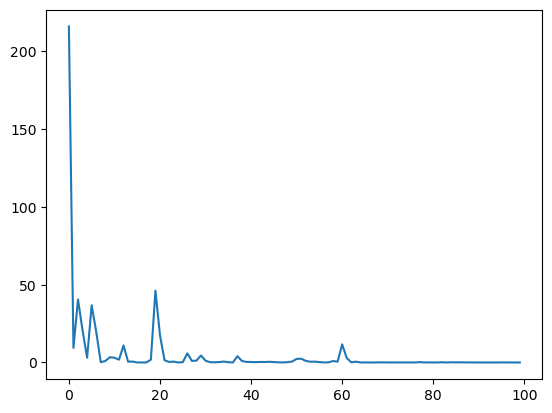

In [5]:
print(error)
plt.plot(error)

In [10]:
weights = [0.18564639821811374, 0.049465710721051284, -0.006078090349358063, 0.006280930051974831, -0.029920816895318274, 0.2020062884995221, -0.410330185079373]
class CheckersGui:
    def __init__(self, board):
        # Initialize Pygame
        pygame.init()

        # Constants
        self.WIDTH, self.HEIGHT = 1000, 1000
        self.ROWS, self.COLS = 10, 10
        self.SQUARE_SIZE = self.HEIGHT // self.ROWS
        self.chance = 0

        # Colors
        self.WHITE = (245, 222, 179) 
        self.BROWN = (184, 115, 51)
        self.RED = (0, 0, 0)
        self.GREEN = (255, 255, 255)
        self.BLUE = (0, 0, 255)

        # Initialize screen
        self.screen = pygame.display.set_mode((self.WIDTH, self.HEIGHT))
        pygame.display.set_caption('Checkers')

        self.board = board

    # Function to draw the board
    def draw_board(self):
        for row in range(self.ROWS):
            for col in range(row % 2, self.COLS, 2):
                pygame.draw.rect(self.screen, self.BROWN, (col * self.SQUARE_SIZE, row * self.SQUARE_SIZE, self.SQUARE_SIZE, self.SQUARE_SIZE))

    # Function to draw the checkers
    def draw_checkers(self):
        for row in range(self.ROWS):
            for col in range(self.COLS):
                if self.board.board[row][col] == 1:  # Player 1's checker
                    pygame.draw.circle(self.screen, self.RED, (col * self.SQUARE_SIZE + self.SQUARE_SIZE // 2, row * self.SQUARE_SIZE + self.SQUARE_SIZE // 2), self.SQUARE_SIZE // 3)
                elif self.board.board[row][col] == 2:  # Player 2's checker
                    pygame.draw.circle(self.screen, self.GREEN, (col * self.SQUARE_SIZE + self.SQUARE_SIZE // 2, row * self.SQUARE_SIZE + self.SQUARE_SIZE // 2), self.SQUARE_SIZE // 3)
                elif self.board.board[row][col] == 11:  # Player 1's king
                    pygame.draw.circle(self.screen, self.RED, (col * self.SQUARE_SIZE + self.SQUARE_SIZE // 2, row * self.SQUARE_SIZE + self.SQUARE_SIZE // 2), self.SQUARE_SIZE // 3)
                    pygame.draw.circle(self.screen, self.WHITE, (col * self.SQUARE_SIZE + self.SQUARE_SIZE // 2, row * self.SQUARE_SIZE + self.SQUARE_SIZE // 2), self.SQUARE_SIZE // 6)
                elif self.board.board[row][col] == 22:  # Player 2's king
                    pygame.draw.circle(self.screen, self.GREEN, (col * self.SQUARE_SIZE + self.SQUARE_SIZE // 2, row * self.SQUARE_SIZE + self.SQUARE_SIZE // 2), self.SQUARE_SIZE // 3)
                    pygame.draw.circle(self.screen, self.WHITE, (col * self.SQUARE_SIZE + self.SQUARE_SIZE // 2, row * self.SQUARE_SIZE + self.SQUARE_SIZE // 2), self.SQUARE_SIZE // 6)

    def update_display(self):
        self.screen.fill(self.WHITE)
        self.draw_board()
        self.draw_checkers()
        pygame.display.flip()
    

    #This will display the possible moves a player can play
    def display_possible_moves(self, moves):
        self.update_display()

        for move in moves:
            row, col = move
            pygame.draw.circle(self.screen, self.BLUE, (col * self.SQUARE_SIZE + self.SQUARE_SIZE // 2, row * self.SQUARE_SIZE + self.SQUARE_SIZE // 2), self.SQUARE_SIZE // 8)
        
    #This essentially makes the move on the computer's behalf
    def computer_move(self):
        # Get all possible moves for the computer
        moves = self.board.get_moves(2)
        print(moves)
        if len(moves) == 0:
            return
        else:

            stats = board.board_stats()
            best_move = []
            best_value = 100000000
            curr_value = weights[0] + weights[1] * stats[1] + weights[2] * stats[2] + weights[3] * stats[3] + weights[4] * stats[4] + weights[5] * stats[5] + weights[6] * stats[6]
    
            for move in moves:
                new_board = Board()
                new_board.board = np.copy(board.board)
                # based on jump we decide the move
                if new_board.board[move[2],move[3]]==1 or new_board.board[move[2],move[3]]==11:
                    new_board.board[move[2]+(move[2]-move[0]),move[3]+(move[3]-move[1])]=board.board[move[0],move[1]]
                    new_board.board[move[2],move[3]]=0
                else:
                    new_board.board[move[2], move[3]] = board.board[move[0], move[1]]
                new_board.board[move[0], move[1]] = 0
                
                new_stats = new_board.board_stats()
                value = weights[0] + weights[1] * new_stats[1] + weights[2] * new_stats[2] + weights[3] * new_stats[3] + weights[4] * new_stats[4] + weights[5] * new_stats[5] + weights[6] * new_stats[6]

                if value < best_value:
                    best_value = value
                    best_move = move
            
            if board.board[best_move[2],best_move[3]]==1 or board.board[best_move[2],best_move[3]]==11:
                    board.board[best_move[2]+(best_move[2]-best_move[0]),best_move[3]+(best_move[3]-best_move[1])]=board.board[best_move[0],best_move[1]]
                    board.board[best_move[2],best_move[3]]=0
            else:
                board.board[best_move[2], best_move[3]] = board.board[best_move[0], best_move[1]]
    
            board.board[best_move[0], best_move[1]] = 0

            #check for kings
            self.board.check(2)

            #now update the board
            self.update_display()

    def play(self):
        self.update_display()
        # Main game loop
        running = True

        curr_moves = []
        curr_checker = []
        flag = 0

        while running:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    running = False
                elif event.type == pygame.MOUSEBUTTONDOWN:
                    x, y = pygame.mouse.get_pos()
                    row = y // self.SQUARE_SIZE
                    col = x // self.SQUARE_SIZE

                    #check if the player has selected a move
                    for move in curr_moves:
                        if row == move[0] and col == move[1]:
                            #means player has selected a move
                            self.board.board[move[0], move[1]] = self.board.board[curr_checker[0], curr_checker[1]]     # not directly 1, as it could be a king # was an error here
                            self.board.board[curr_checker[0], curr_checker[1]] = 0
                            
                            #if in between curr pos and new pos there is an enemy
                            if abs(curr_checker[0]-move[0])>1:
                                self.board.board[(curr_checker[0]+move[0])//2, (curr_checker[1]+move[1])//2] = 0
                            
                            #check for kings
                            self.board.check(1)

                            #update the display
                            self.update_display()

                            #reset the curr_moves and curr_checker
                            curr_moves = []
                            curr_checker = []
                            flag = 1
                            break

                    #if flag is 1, means player has made the move
                    if flag == 1:
                        flag = 0

                        #otherwise movement is too fast
                        time.sleep(1)

                        #player has made the move, now we call function for the 
                        #computer to make its move
                        self.computer_move()

                        continue

                    #we first get the possible moves
                    moves = self.board.get_available_moves(1,row,col)
                    print(moves)
                    curr_moves = moves
                    curr_checker = [row,col]

                    #then display the available moves
                    self.display_possible_moves(moves)
                    pygame.display.flip()

if __name__ == "__main__":
    # Initialize the board
    board = Board()
    gui = CheckersGui(board)
    gui.play()

[(5, 3), (5, 5)]
[[3, 1, 4, 0], [3, 1, 4, 2], [3, 3, 4, 2], [3, 3, 4, 4], [3, 5, 4, 4], [3, 5, 4, 6], [3, 7, 4, 6], [3, 7, 4, 8], [3, 9, 4, 8]]
[(4, 4)]
[(6, 4)]
[(6, 4)]
[(5, 1), (5, 3)]
[[4, 6, 5, 5]]
[]
[(5, 5)]
[[2, 4, 3, 5], [2, 6, 3, 5], [3, 1, 4, 0], [3, 1, 4, 2], [3, 3, 4, 2], [3, 3, 4, 4], [3, 7, 4, 6], [3, 7, 4, 8], [3, 9, 4, 8]]
[(4, 4), (4, 6)]
[(4, 4)]
[(6, 4)]
[[2, 2, 3, 3], [2, 4, 3, 3], [2, 4, 3, 5], [2, 6, 3, 5], [3, 1, 4, 0], [3, 7, 4, 6], [3, 7, 4, 8], [3, 9, 4, 8], [4, 2, 5, 1]]
[(7, 3)]
[[1, 1, 2, 2], [1, 3, 2, 2], [2, 4, 3, 5], [2, 6, 3, 5], [3, 1, 4, 0], [3, 3, 4, 4], [3, 7, 4, 6], [3, 7, 4, 8], [3, 9, 4, 8], [4, 2, 5, 1]]
[(3, 5)]
[[2, 4, 3, 5], [2, 6, 3, 5]]
[(8, 2)]
[[1, 1, 2, 2], [1, 3, 2, 2], [1, 3, 2, 4], [1, 5, 2, 4], [2, 6, 3, 5], [3, 1, 4, 0], [3, 7, 4, 8], [3, 9, 4, 8], [4, 2, 5, 1], [4, 2, 5, 3], [4, 6, 5, 7]]
[(6, 2)]
[[5, 3, 6, 4]]
[(6, 4)]
[[1, 1, 2, 2], [1, 3, 2, 2], [1, 3, 2, 4], [1, 5, 2, 4], [2, 6, 3, 5], [3, 1, 4, 0], [3, 1, 4, 2], [3, 7, 4, 8]

: 